### Hypothesis testing

This noteboook reproduces the plots corresponding to Figures 2 d,e in the manuscript “Pancreas-liver in vitro and in silico hybrid model for human diabetic dysregulation”. The figures are saved in the `exported_figs` folder.

##### Import packages and define plotting settings

In [81]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.io import loadmat

from figure_styles import (seaborn_style, 
                                      group_colors, figpath,
                                      FIGURE_WIDTH, FIGURE_HEIGHT)
from pylab import cm
from matplotlib import patches as mpatches

# Load functions with figure styles
figpath = figpath()
seaborn_style()
pal = group_colors()

# Set color array
colors = [[0.92,0.68,0.0353],[0.8,0,0.2]]
colors1 = [[0.8,0,0.2], [0.92,0.68,0.0353]]

# Set custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))


customPalette1 = sns.set_palette(sns.color_palette(colors1))


dataChip14 = pd.read_csv (r'ExperimentalDataChip14.csv')   
simulationsChip14Hyper = pd.read_csv (r'SimulationsChip14Hyper.csv') 
simulationsChip14Normo = pd.read_csv (r'SimulationsChip14Normo.csv') 
predictionChip14DoseB = pd.read_csv (r'PredictionChip14doseB.csv')   
predictionsChip14HyperDoseB = pd.read_csv (r'PredictionsChip14HyperDoseB.csv')   
predictionsChip14NormoDoseB = pd.read_csv (r'PredictionsChip14NormoDoseB.csv')   


/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


##### Import data

In [82]:
dataChip14 = pd.read_csv (r'ExperimentalDataChip14.csv')   
simulationsChip14Hyper = pd.read_csv (r'SimulationsChip14Hyper.csv') 
simulationsChip14Normo = pd.read_csv (r'SimulationsChip14Normo.csv') 
predictionChip14DoseB = pd.read_csv (r'PredictionChip14doseB.csv')   
predictionsChip14HyperDoseB = pd.read_csv (r'PredictionsChip14HyperDoseB.csv')   
predictionsChip14NormoDoseB = pd.read_csv (r'PredictionsChip14NormoDoseB.csv')   

predictionsChip14HyperDoseB = predictionsChip14HyperDoseB[predictionsChip14HyperDoseB['time_GTT']<=48]
predictionsChip14NormoDoseB = predictionsChip14NormoDoseB[predictionsChip14NormoDoseB['time_GTT']<=48]

##### Plot glucose prediction for GTT days 13-15 corresponding to hypothesis 1

/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


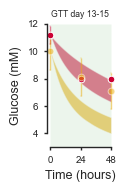

In [83]:


plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, 
                    hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

fig.map(plt.errorbar, "time_GTT", "Glucose_mean", "Glucose_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3,
       alpha=0.5)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# 
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)#                                         
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H1_G_min', y2='H1_G_max', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H1_G_min', y2='H1_G_max', alpha=0.5, 
                    facecolor=colors[0])

# Overlay shaded area to indicate prediction

rect=mpatches.Rectangle((0,0),48,12, 
                        alpha=0.075,
                        facecolor='green')

plt.gca().add_patch(rect)

plt.text(23, 12.5, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_xlim(-3,50)
fig.ax.set_ylim(3,12)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionGlucoseH1doseB.pdf"))



##### Plot glucose prediction for GTT days 13-15 corresponding to hypothesis 2

/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


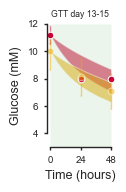

In [84]:
plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

fig.map(plt.errorbar, "time_GTT", "Glucose_mean", "Glucose_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3,
       alpha=0.5)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# 
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Glucose_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)#     
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H2_G_min', y2='H2_G_max', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H2_G_min', y2='H2_G_max', alpha=0.5, 
                    facecolor=colors[0])

rect=mpatches.Rectangle((0,0),48,12, 
                        alpha=0.075,
                        facecolor='green')

plt.text(23, 12.5, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

plt.gca().add_patch(rect)

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_yticks([4,6,8,10,12])
fig.ax.set_xlim(-3,50)
fig.ax.set_ylim(3,12)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionGlucoseH2doseB.pdf"))


##### Plot insulin prediction for GTT days 13-15 corresponding to hypothesis 1

/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


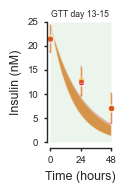

In [85]:

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette1,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_GTT", "Insulin_mean", "Insulin_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3,
       alpha=0.5)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# overlay the simulated
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)# overlay the simulated
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H1_I_min_nM', y2='H1_I_max_nM', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H1_I_min_nM', y2='H1_I_max_nM', alpha=0.5, 
                    facecolor=colors[0])

rect=mpatches.Rectangle((0,0),48,25, 
                        alpha=0.075,
                        facecolor='green')
plt.gca().add_patch(rect)

plt.text(23, 26, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

fig.set_axis_labels('Time (hours)', 'Insulin (nM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_xlim(-3,50)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionInsulinH1doseB.pdf"))


##### Plot insulin prediction for GTT days 13-15 corresponding to hypothesis 2

/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/belen/opt/anaconda3/envs/manuscript_IR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


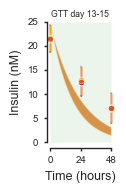

In [86]:

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14DoseB, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_GTT", "Insulin_mean", "Insulin_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Hyperglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette1, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=1)# overlay the simulated
sns.lineplot(data=predictionChip14DoseB[(predictionChip14DoseB['Glycemic_level'] == 'Normoglycemia')],
             x='time_GTT', y='Insulin_mean', marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None, alpha=0.5)# overlay the simulated
fig.ax.fill_between(data=predictionsChip14HyperDoseB, x='time_GTT', y1='H2_I_min_nM', y2='H2_I_max_nM', alpha=0.5, 
                    facecolor=colors[1])
fig.ax.fill_between(data=predictionsChip14NormoDoseB, x='time_GTT', y1='H2_I_min_nM', y2='H2_I_max_nM', alpha=0.5, 
                    facecolor=colors[0])

rect=mpatches.Rectangle((0,0),48,25, 
                        alpha=0.075,
                        facecolor='green')
plt.gca().add_patch(rect)

plt.text(23, 26, 'GTT day 13-15', horizontalalignment = 'center', fontsize = 'x-small')

fig.set_axis_labels('Time (hours)', 'Insulin (nM)')
fig.ax.set_xticks([0,24,48,72])
fig.ax.set_xlim(-3,50)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionInsulinH2doseB.pdf"))

##### Plot graph to estimate the insulin dose needed to distinguish between hypothesis H1 and H2

###### Import data corresponding to glucose simulations at hyper and normoglycemia at the selected dose for both hypotheses

In [87]:
G_5p5mM_H1 = loadmat('G_5p5mM_H1.mat')
G_11mM_H1 = loadmat('G_11mM_H1.mat')
G_5p5mM_H2 = loadmat('G_5p5mM_H2.mat')
G_11mM_H2 = loadmat('G_11mM_H2.mat')

In [88]:

df_G_5p5mM_H1 = pd.DataFrame.from_records(G_5p5mM_H1['Gmeasured_5p5mM_H1']).transpose()
df_G_11mM_H1 = pd.DataFrame.from_records(G_11mM_H1['Gmeasured_11mM_H1']).transpose()
df_G_5p5mM_H2 = pd.DataFrame.from_records(G_5p5mM_H2['Gmeasured_5p5mM_H2']).transpose()
df_G_11mM_H2 = pd.DataFrame.from_records(G_11mM_H2['Gmeasured_11mM_H2']).transpose()

In [89]:
df_H1 = pd.DataFrame()
df_H2 = pd.DataFrame()

# Compute the difference between hyper- and normoglycemic responses for both hypotheses
for col in df_G_5p5mM_H1.columns:
    df_H1[col] = df_G_11mM_H1[col] - df_G_5p5mM_H1[col]
    df_H2[col] = df_G_11mM_H2[col] - df_G_5p5mM_H2[col]

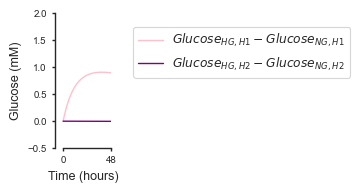

In [90]:
fig = sns.FacetGrid(data=df_H1, 
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)
sns.lineplot(df_H1.iloc[28800:,1:2], palette=['pink'], alpha=1, legend = 'auto', linestyle = '-')
sns.lineplot(df_H2.iloc[28800:,1:2], palette=['purple'], alpha=1, legend = 'auto')

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([28800,33601])
fig.ax.set_yticks([-0.5,0,0.5,1,1.5,2])
fig.ax.set_ylim(-0.5,2)
fig.ax.set_xlim(28000,33601)
fig.ax.set_xticklabels([0,48])
xtix = fig.ax.get_xticks()
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)

legend_labels, _= fig.ax.get_legend_handles_labels()
fig.ax.legend(legend_labels, ['$Glucose_{HG,H1} - Glucose_{NG,H1}$', '$Glucose_{HG,H2} - Glucose_{NG,H2}$'],bbox_to_anchor=(1.4, 0.9), loc='upper left', borderaxespad=0 )

fig.savefig(os.path.join(figpath, "supplementaryFig2.pdf"))